## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

import os
import joblib

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

random_state = 4012

In [2]:
X_test = pd.read_csv('../Processed Data Files/X_test.csv')
y_test = pd.read_csv('../Processed Data Files/y_test.csv')

def evaluate(x_test,y_test,name,model,preprocessor):

    print(model,"\n")
    
    y_pred = model.predict(preprocessor.transform(x_test))

    scores = {}
    scores["Accuracy"]  = accuracy_score(y_test,y_pred).round(3)
    scores["Precision"] = precision_score(y_test,y_pred,average="weighted").round(3)
    scores["Recall"]    = recall_score(y_test,y_pred,average="weighted").round(3)
    scores["F1"]        = f1_score(y_test,y_pred,average="weighted").round(3)
    scores["ROC AUC"]   = roc_auc_score(y_test,y_pred,average="weighted").round(3)
    scores = {name:scores}
    print(pd.DataFrame(scores))

    cm = confusion_matrix(y_test,y_pred)
    cm_plot = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

### Decision Tree

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       random_state=4012) 

           decision_tree
Accuracy           0.865
F1                 0.893
Precision          0.939
ROC AUC            0.802
Recall             0.865


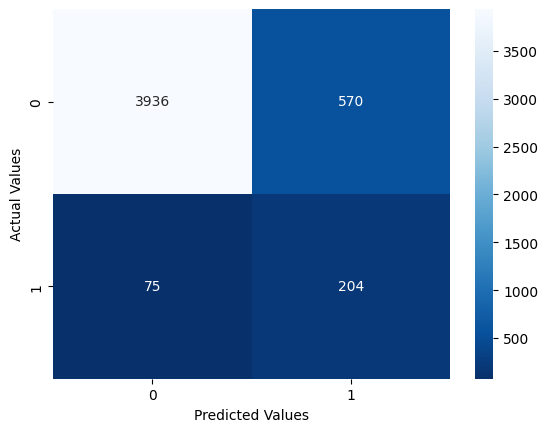

In [3]:
name = "decision_tree"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

### Random Forest

In [ ]:

name = "random_forest"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

### AdaBoost

AdaBoostClassifier(learning_rate=1, n_estimators=300, random_state=4012) 

           adaboost
Accuracy      0.974
F1            0.973
Precision     0.973
ROC AUC       0.837
Recall        0.974


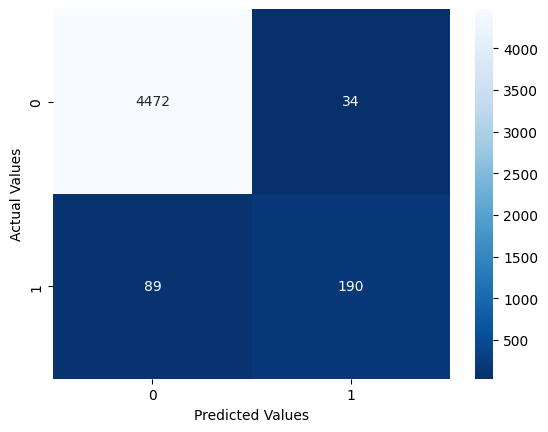

In [4]:

name = "adaboost"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

### XGBoost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=4012, ...) 

           xgboost
Accuracy     0.982
F1           0.981
Precision    0.981
ROC AUC      0.864
Recall       0.982


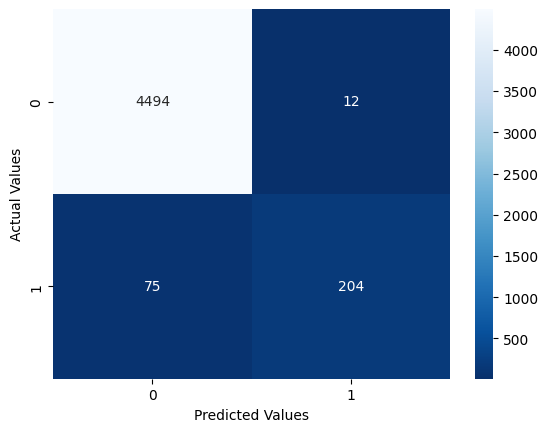

In [4]:

name = "xgboost"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

### CatBoost


           catboost
Accuracy      0.985
F1            0.985
Precision     0.985
ROC AUC       0.923
Recall        0.985


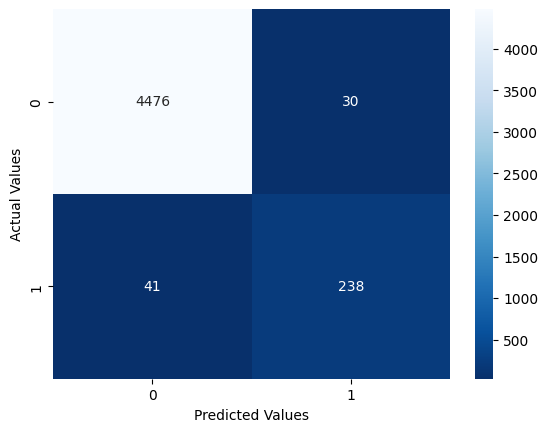

In [4]:

name = "catboost"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])